In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
import warnings
warnings.filterwarnings('ignore')

## 1.2 讀取 .csv

In [3]:
data = pd.read_csv('housing.csv')


In [4]:
data.isnull().any()

longitude             False
latitude              False
housing_median_age    False
total_rooms           False
total_bedrooms         True
population            False
households            False
median_income         False
median_house_value    False
ocean_proximity       False
dtype: bool

In [5]:
data.dropna(inplace=True)

In [6]:
data.isnull().any()

longitude             False
latitude              False
housing_median_age    False
total_rooms           False
total_bedrooms        False
population            False
households            False
median_income         False
median_house_value    False
ocean_proximity       False
dtype: bool

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns
%config InlineBackend.figure_format = 'retina'

In [8]:
data.iloc[:,:8].describe()

longitude      latitude  housing_median_age   total_rooms  \
count  20433.000000  20433.000000        20433.000000  20433.000000   
mean    -119.570689     35.633221           28.633094   2636.504233   
std        2.003578      2.136348           12.591805   2185.269567   
min     -124.350000     32.540000            1.000000      2.000000   
25%     -121.800000     33.930000           18.000000   1450.000000   
50%     -118.490000     34.260000           29.000000   2127.000000   
75%     -118.010000     37.720000           37.000000   3143.000000   
max     -114.310000     41.950000           52.000000  39320.000000   

       total_bedrooms    population    households  median_income  
count    20433.000000  20433.000000  20433.000000   20433.000000  
mean       537.870553   1424.946949    499.433465       3.871162  
std        421.385070   1133.208490    382.299226       1.899291  
min          1.000000      3.000000      1.000000       0.499900  
25%        296.000000    787.000000    280.000000       2.563700  
50%        435.000000   1166.000000    409.000000       3.536500  
75%        647.000000   1722.000000    604.000000       4.744000  
max       6445.000000  35682.000000   6082.000000      15.000100

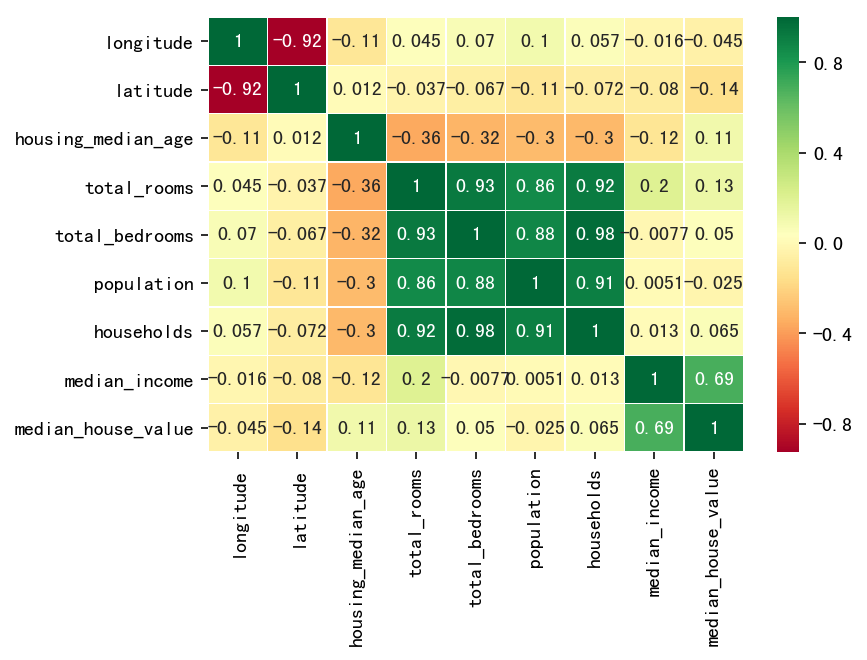

In [9]:
sns.heatmap(data.iloc[:,:9].corr(),annot=True,cmap='RdYlGn',linewidths=0.2)


In [10]:
corr_matrix = data.iloc[:,:9].corr()

In [11]:
corr_matrix['median_house_value'].sort_values(ascending=False)
print(corr_matrix['median_house_value'].sort_values(ascending=False))

median_house_value    1.000000
median_income         0.688355
total_rooms           0.133294
housing_median_age    0.106432
households            0.064894
total_bedrooms        0.049686
population           -0.025300
longitude            -0.045398
latitude             -0.144638
Name: median_house_value, dtype: float64


In [12]:
x = np.array(data)[:, :8]
x

array([[-122.23, 37.88, 41.0, ..., 322.0, 126.0, 8.3252],
       [-122.22, 37.86, 21.0, ..., 2401.0, 1138.0, 8.3014],
       [-122.24, 37.85, 52.0, ..., 496.0, 177.0, 7.2574],
       ...,
       [-121.22, 39.43, 17.0, ..., 1007.0, 433.0, 1.7],
       [-121.32, 39.43, 18.0, ..., 741.0, 349.0, 1.8672],
       [-121.24, 39.37, 16.0, ..., 1387.0, 530.0, 2.3886]], dtype=object)

In [13]:
y = np.array(data)[:, 8]
y

array([452600.0, 358500.0, 352100.0, ..., 92300.0, 84700.0, 89400.0],
      dtype=object)

In [14]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

train,test = train_test_split(data.iloc[:,:9],random_state=777, train_size=0.8)
train_x = np.array(train.iloc[:,:7])
test_x = np.array(test.iloc[:,:7])
train_y = np.array(train.iloc[:,8:])
test_y = np.array(test.iloc[:,8:])

In [15]:
train.shape

(16346, 9)

In [16]:
test.shape

(4087, 9)

In [17]:
reg = LinearRegression().fit(train_x, train_y)
reg.score(train_x,train_y)
reg.coef_

reg.predict(test_x)

array([[253800.97509463],
       [142878.65230116],
       [308167.2585619 ],
       ...,
       [105824.97386466],
       [194030.14831635],
       [223699.47124769]])

In [18]:
from math import sqrt
from sklearn.metrics import r2_score,mean_squared_error,mean_absolute_error

def MSE(targets,predictions):
    return str (np.round_(mean_squared_error(targets,predictions),2)/100000000000)
     #(np.sum((y_pred-y_val)**2)/len(y_val))    #-網路

def MAE(targets,predictions):
     return str (np.round_(mean_absolute_error(targets,predictions),2))

def R2(targets,predictions):
    return str (np.round_(r2_score(targets,predictions),2))
 
def CPK(targets,predictions):
    return str(np.round_(spec/(6*np.sqrt(((predictions - targets) ** 2).mean())),2))
             
def mape(targets,predictions): 
    n=len(targets)
    #n=targets.shape[0]
    return np.round_(sum(np.abs((predictions-targets)/targets))/n,2)
    
def rmse(targets,predictions):
    return str(np.round_( np.sqrt(((predictions - targets) ** 2).mean()),2)/1000000) 
   
def hit_rate(targets,predictions):
    n=len(targets)
    diff=np.abs((predictions - targets)/targets)
    z=np.round_(sum(np.where(diff>0.1,0,1))/n,5)
    return str(z)   

In [19]:
from sklearn.model_selection import GridSearchCV
from xgboost import XGBRegressor

param_test={
    #'max_depth':[4,5,6],
    #'min_child_weight':[2,3,4]
    'max_depth':[30],
    'min_child_weight':[1,2,3]
}
gsearch=GridSearchCV(estimator=XGBRegressor(),param_grid=param_test);
gsearch.fit(train_x,train_y)

GridSearchCV(cv='warn', error_score='raise-deprecating',
       estimator=XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, importance_type='gain',
       learning_rate=0.1, max_delta_step=0, max_depth=3,
       min_child_weight=1, missing=None, n_estimators=100, n_jobs=1,
       nthread=None, objective='reg:linear', random_state=0, reg_alpha=0,
       reg_lambda=1, scale_pos_weight=1, seed=None, silent=True,
       subsample=1),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'max_depth': [30], 'min_child_weight': [1, 2, 3]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [20]:
gsearch.cv_results_,gsearch.best_params_,gsearch.best_score_

({'mean_fit_time': array([4.48146836, 4.33836285, 4.0263656 ]),
  'std_fit_time': array([0.05152434, 0.09101896, 0.08119295]),
  'mean_score_time': array([0.30899938, 0.24801016, 0.17633303]),
  'std_score_time': array([0.01202681, 0.0212831 , 0.01721143]),
  'param_max_depth': masked_array(data=[30, 30, 30],
               mask=[False, False, False],
         fill_value='?',
              dtype=object),
  'param_min_child_weight': masked_array(data=[1, 2, 3],
               mask=[False, False, False],
         fill_value='?',
              dtype=object),
  'params': [{'max_depth': 30, 'min_child_weight': 1},
   {'max_depth': 30, 'min_child_weight': 2},
   {'max_depth': 30, 'min_child_weight': 3}],
  'split0_test_score': array([0.79810465, 0.80410222, 0.80716574]),
  'split1_test_score': array([0.79471859, 0.80022272, 0.80371897]),
  'split2_test_score': array([0.7861934 , 0.79518347, 0.79662663]),
  'mean_test_score': array([0.79300596, 0.79983642, 0.80250414]),
  'std_test_score': ar

In [21]:
gsearch.best_score_

0.8025041395875934

In [22]:
model=gsearch.best_estimator_
y_pred = model.predict(test_x)

In [23]:
mape(test_y,y_pred)

array([0.54, 0.45, 1.54, ..., 0.55, 0.46, 0.68])

In [24]:
rmse(test_y,y_pred)

'0.15452173000000002'

In [25]:
print('實際值.MAPE: '+ str(mape(test_y,y_pred)) +'   RMSE:'+ str(rmse(test_y,y_pred)))

實際值.MAPE: [0.54 0.45 1.54 ... 0.55 0.46 0.68]   RMSE:0.15452173000000002


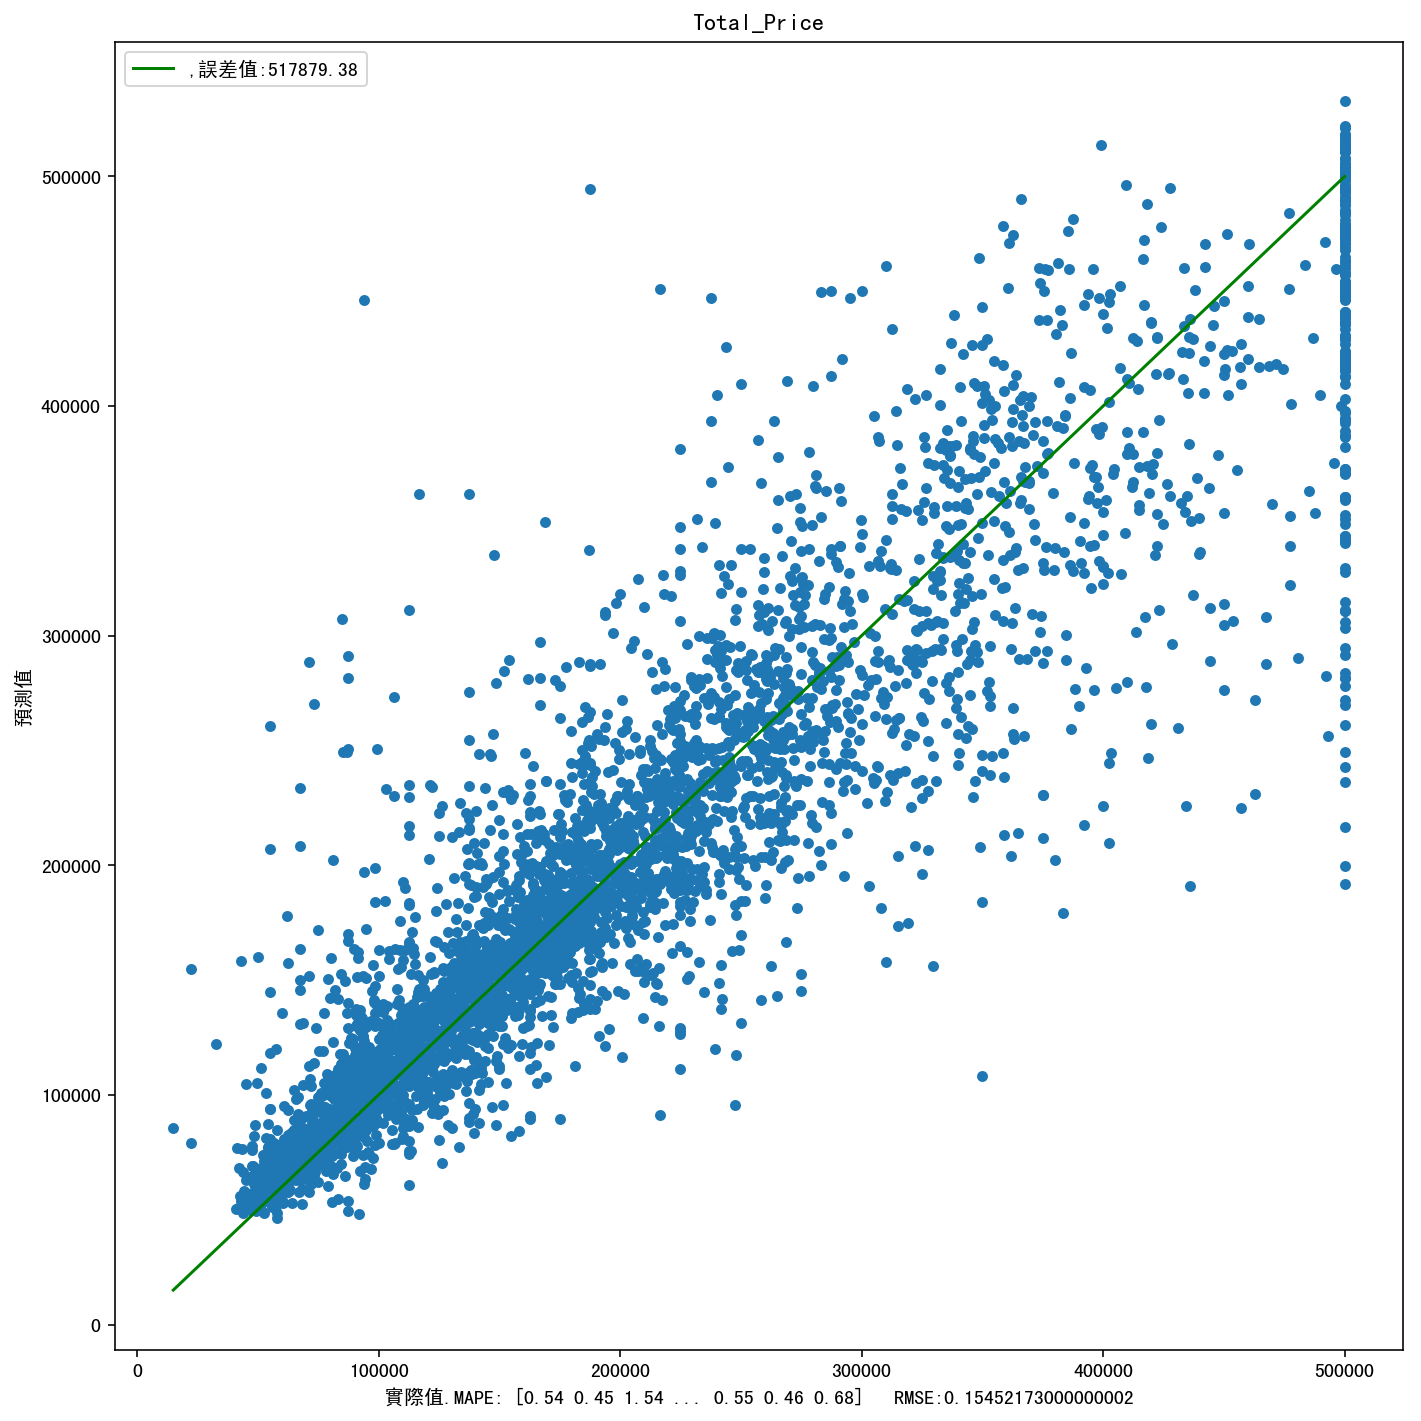

In [26]:
plt.figure(figsize=(10,10))
plt.scatter(test_y, y_pred, s=20)
plt.title('Total_Price')
plt.ylabel('預測值')
plt.xlabel('實際值.MAPE: '+ str(mape(test_y,y_pred)) +'   RMSE:'+ str(rmse(test_y,y_pred)))
plt.plot([min(test_y), max(test_y)], [min(test_y), max(test_y)], color='green',label=',誤差值:'
         +str( np.max(np.round_(abs(test_y - y_pred),2))))
plt.legend(loc='upper left')
plt.tight_layout()

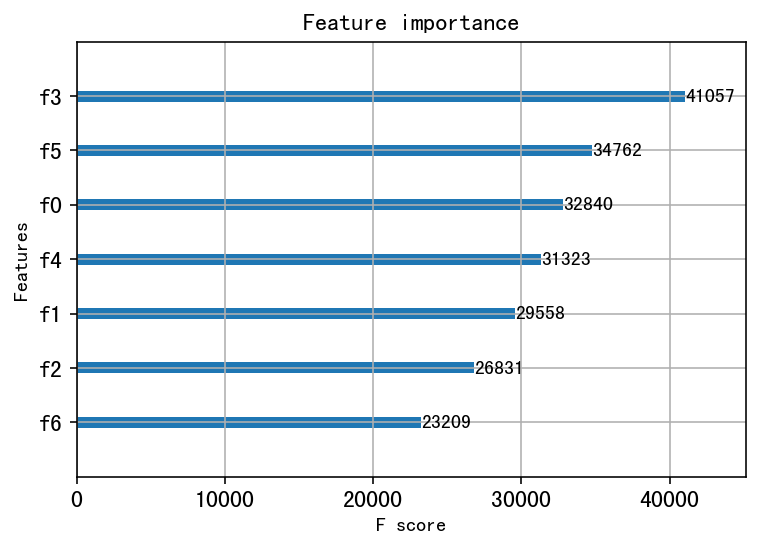

In [27]:
from xgboost import plot_importance
from matplotlib import pyplot as plt
plot_importance(model)
# 设置刻度字体大小
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
#plt.savefig(r"C:\dataset-0510\abc.png",dpi=800)
#files.download(r"C:\dataset-0510\abc.png") 
plt.show() 

## 特徵工程

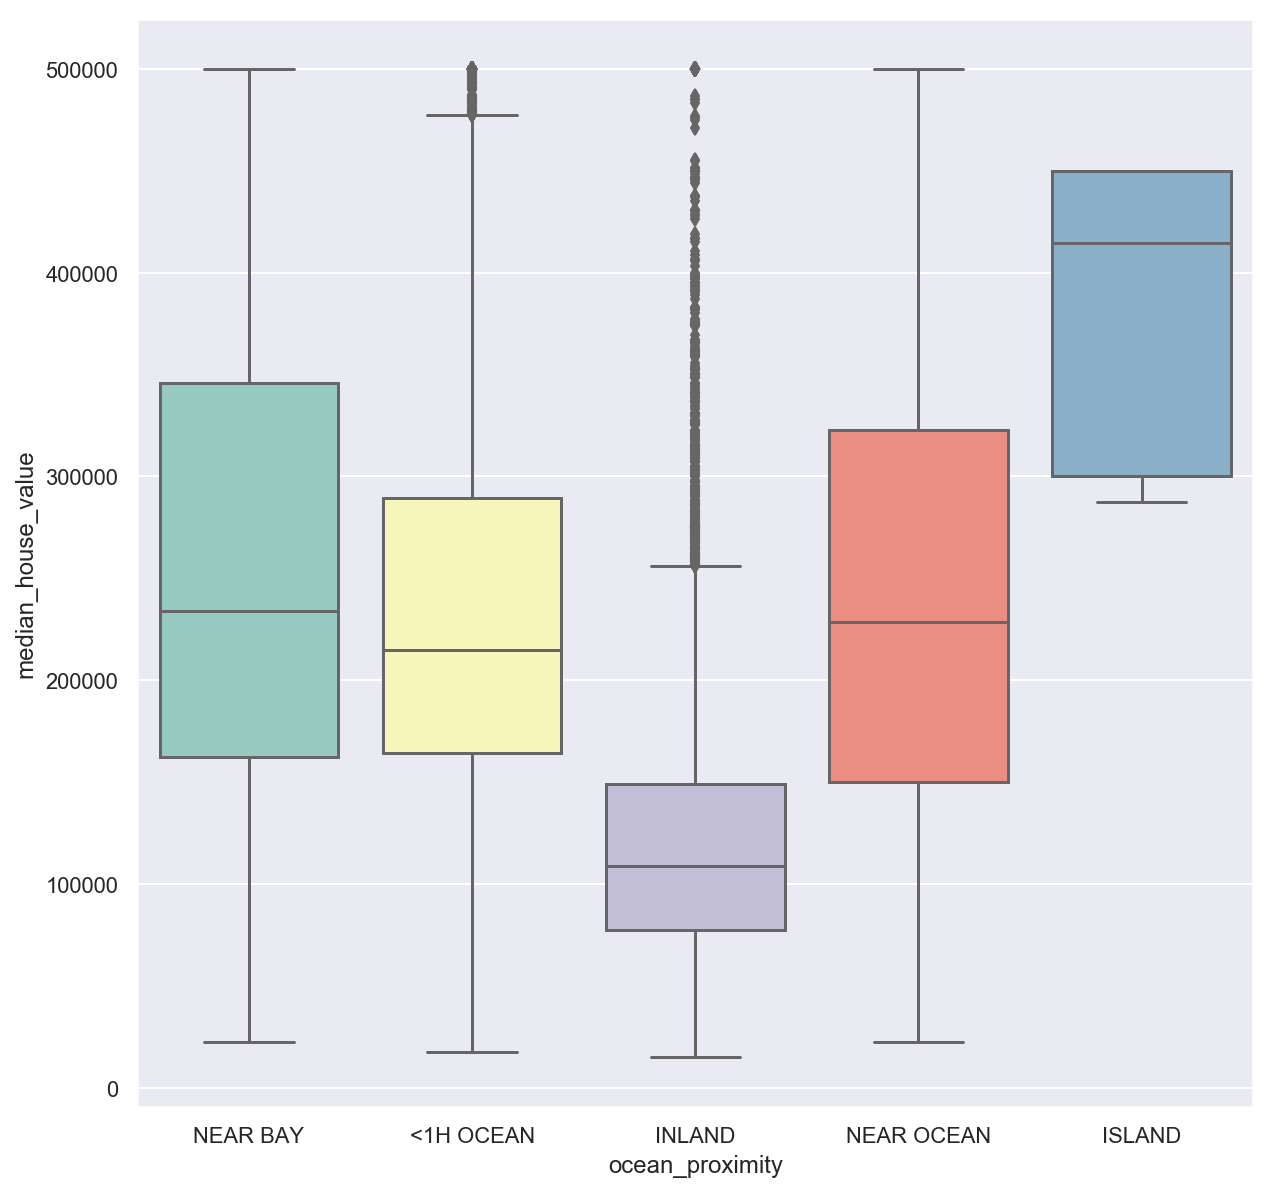

In [29]:
df = data
#ocean_proximity 與價格的關係
#ISLAND 最貴  > NEAR BAY > NEAR OCEAN = <1H OCEAN (差不多) > INLAND  最便宜
#
sns.set(font_scale=1)
f = plt.figure(figsize=(10,10)) 
sns.boxplot(x="ocean_proximity", y="median_house_value",data=df, palette="Set3")

In [30]:
#查看ocean_proximity分布,只有5筆 ISLAND
df['ocean_proximity'].value_counts()

<1H OCEAN     9034
INLAND        6496
NEAR OCEAN    2628
NEAR BAY      2270
ISLAND           5
Name: ocean_proximity, dtype: int64

In [31]:
df2 = df[df['ocean_proximity'] == 'ISLAND']
df2

longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
8314    -118.32     33.35                27.0       1675.0           521.0   
8315    -118.33     33.34                52.0       2359.0           591.0   
8316    -118.32     33.33                52.0       2127.0           512.0   
8317    -118.32     33.34                52.0        996.0           264.0   
8318    -118.48     33.43                29.0        716.0           214.0   

      population  households  median_income  median_house_value  \
8314       744.0       331.0         2.1579            450000.0   
8315      1100.0       431.0         2.8333            414700.0   
8316       733.0       288.0         3.3906            300000.0   
8317       341.0       160.0         2.7361            450000.0   
8318       422.0       173.0         2.6042            287500.0   

     ocean_proximity  
8314          ISLAND  
8315          ISLAND  
8316          ISLAND  
8317          ISLAND  
8318          ISLAND

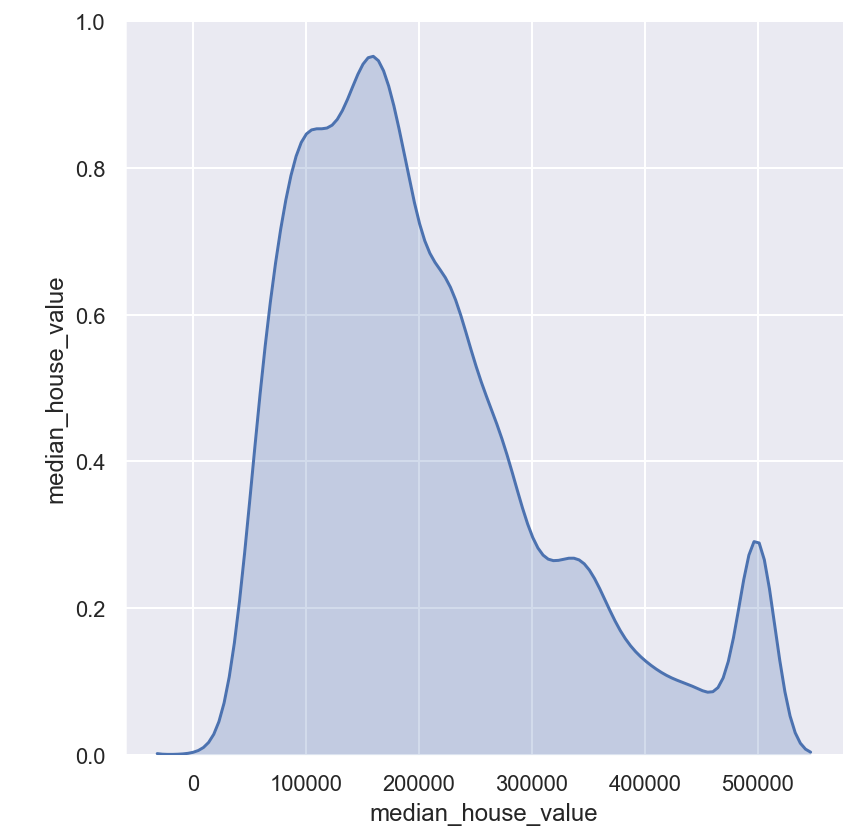

In [32]:
sns.pairplot(df, 
             vars = ['median_house_value'], diag_kind = 'kde',
             plot_kws = {'alpha': 1, 's': 80, 'edgecolor': 'k'},
             height = 6);

In [33]:
df = data
highAvg=df['median_house_value'].quantile(0.92) #80%分位数
highAvg

410300.0

In [34]:
subDf=df[df['median_house_value']>=highAvg]
subDf

longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
0        -122.23     37.88                41.0        880.0           129.0   
89       -122.27     37.80                52.0        249.0            78.0   
128      -122.21     37.83                40.0       4991.0           674.0   
140      -122.18     37.81                30.0        292.0            38.0   
155      -122.23     37.81                52.0       2315.0           292.0   
...          ...       ...                 ...          ...             ...   
20426    -118.69     34.18                11.0       1177.0           138.0   
20427    -118.80     34.19                 4.0      15572.0          2222.0   
20428    -118.83     34.23                 6.0       8803.0          1114.0   
20436    -118.69     34.21                10.0       3663.0           409.0   
20443    -118.85     34.27                50.0        187.0            33.0   

       population  households  median_income  median_house_value  \
0           322.0       126.0         8.3252            452600.0   
89          396.0        85.0         1.2434            500001.0   
128        1616.0       654.0         7.5544            411500.0   
140         126.0        52.0         6.3624            483300.0   
155         861.0       258.0         8.8793            410300.0   
...           ...         ...            ...                 ...   
20426       415.0       119.0        10.0472            500001.0   
20427      5495.0      2152.0         8.6499            500001.0   
20428      3385.0      1010.0         8.7288            425800.0   
20436      1179.0       371.0        12.5420            500001.0   
20443       130.0        35.0         3.3438            500001.0   

      ocean_proximity  
0            NEAR BAY  
89           NEAR BAY  
128          NEAR BAY  
140          NEAR BAY  
155          NEAR BAY  
...               ...  
20426       <1H OCEAN  
20427       <1H OCEAN  
20428       <1H OCEAN  
20436       <1H OCEAN  
20443       <1H OCEAN  

[1636 rows x 10 columns]

In [35]:
#得出距離蛋黃區的歐氏距離
cityLat=subDf['latitude'].mean()
cityLon=subDf['longitude'].mean()

df['cityLat'] = cityLat
df['cityLon'] = cityLon

print("市中心:" + str(cityLat)+" "+str(cityLon))

df['cityDis']=np.sqrt((df['latitude']-df['cityLat'])**2+(df['longitude']-df['cityLon'])**2)

市中心:35.297004889975625 -119.7590525672371


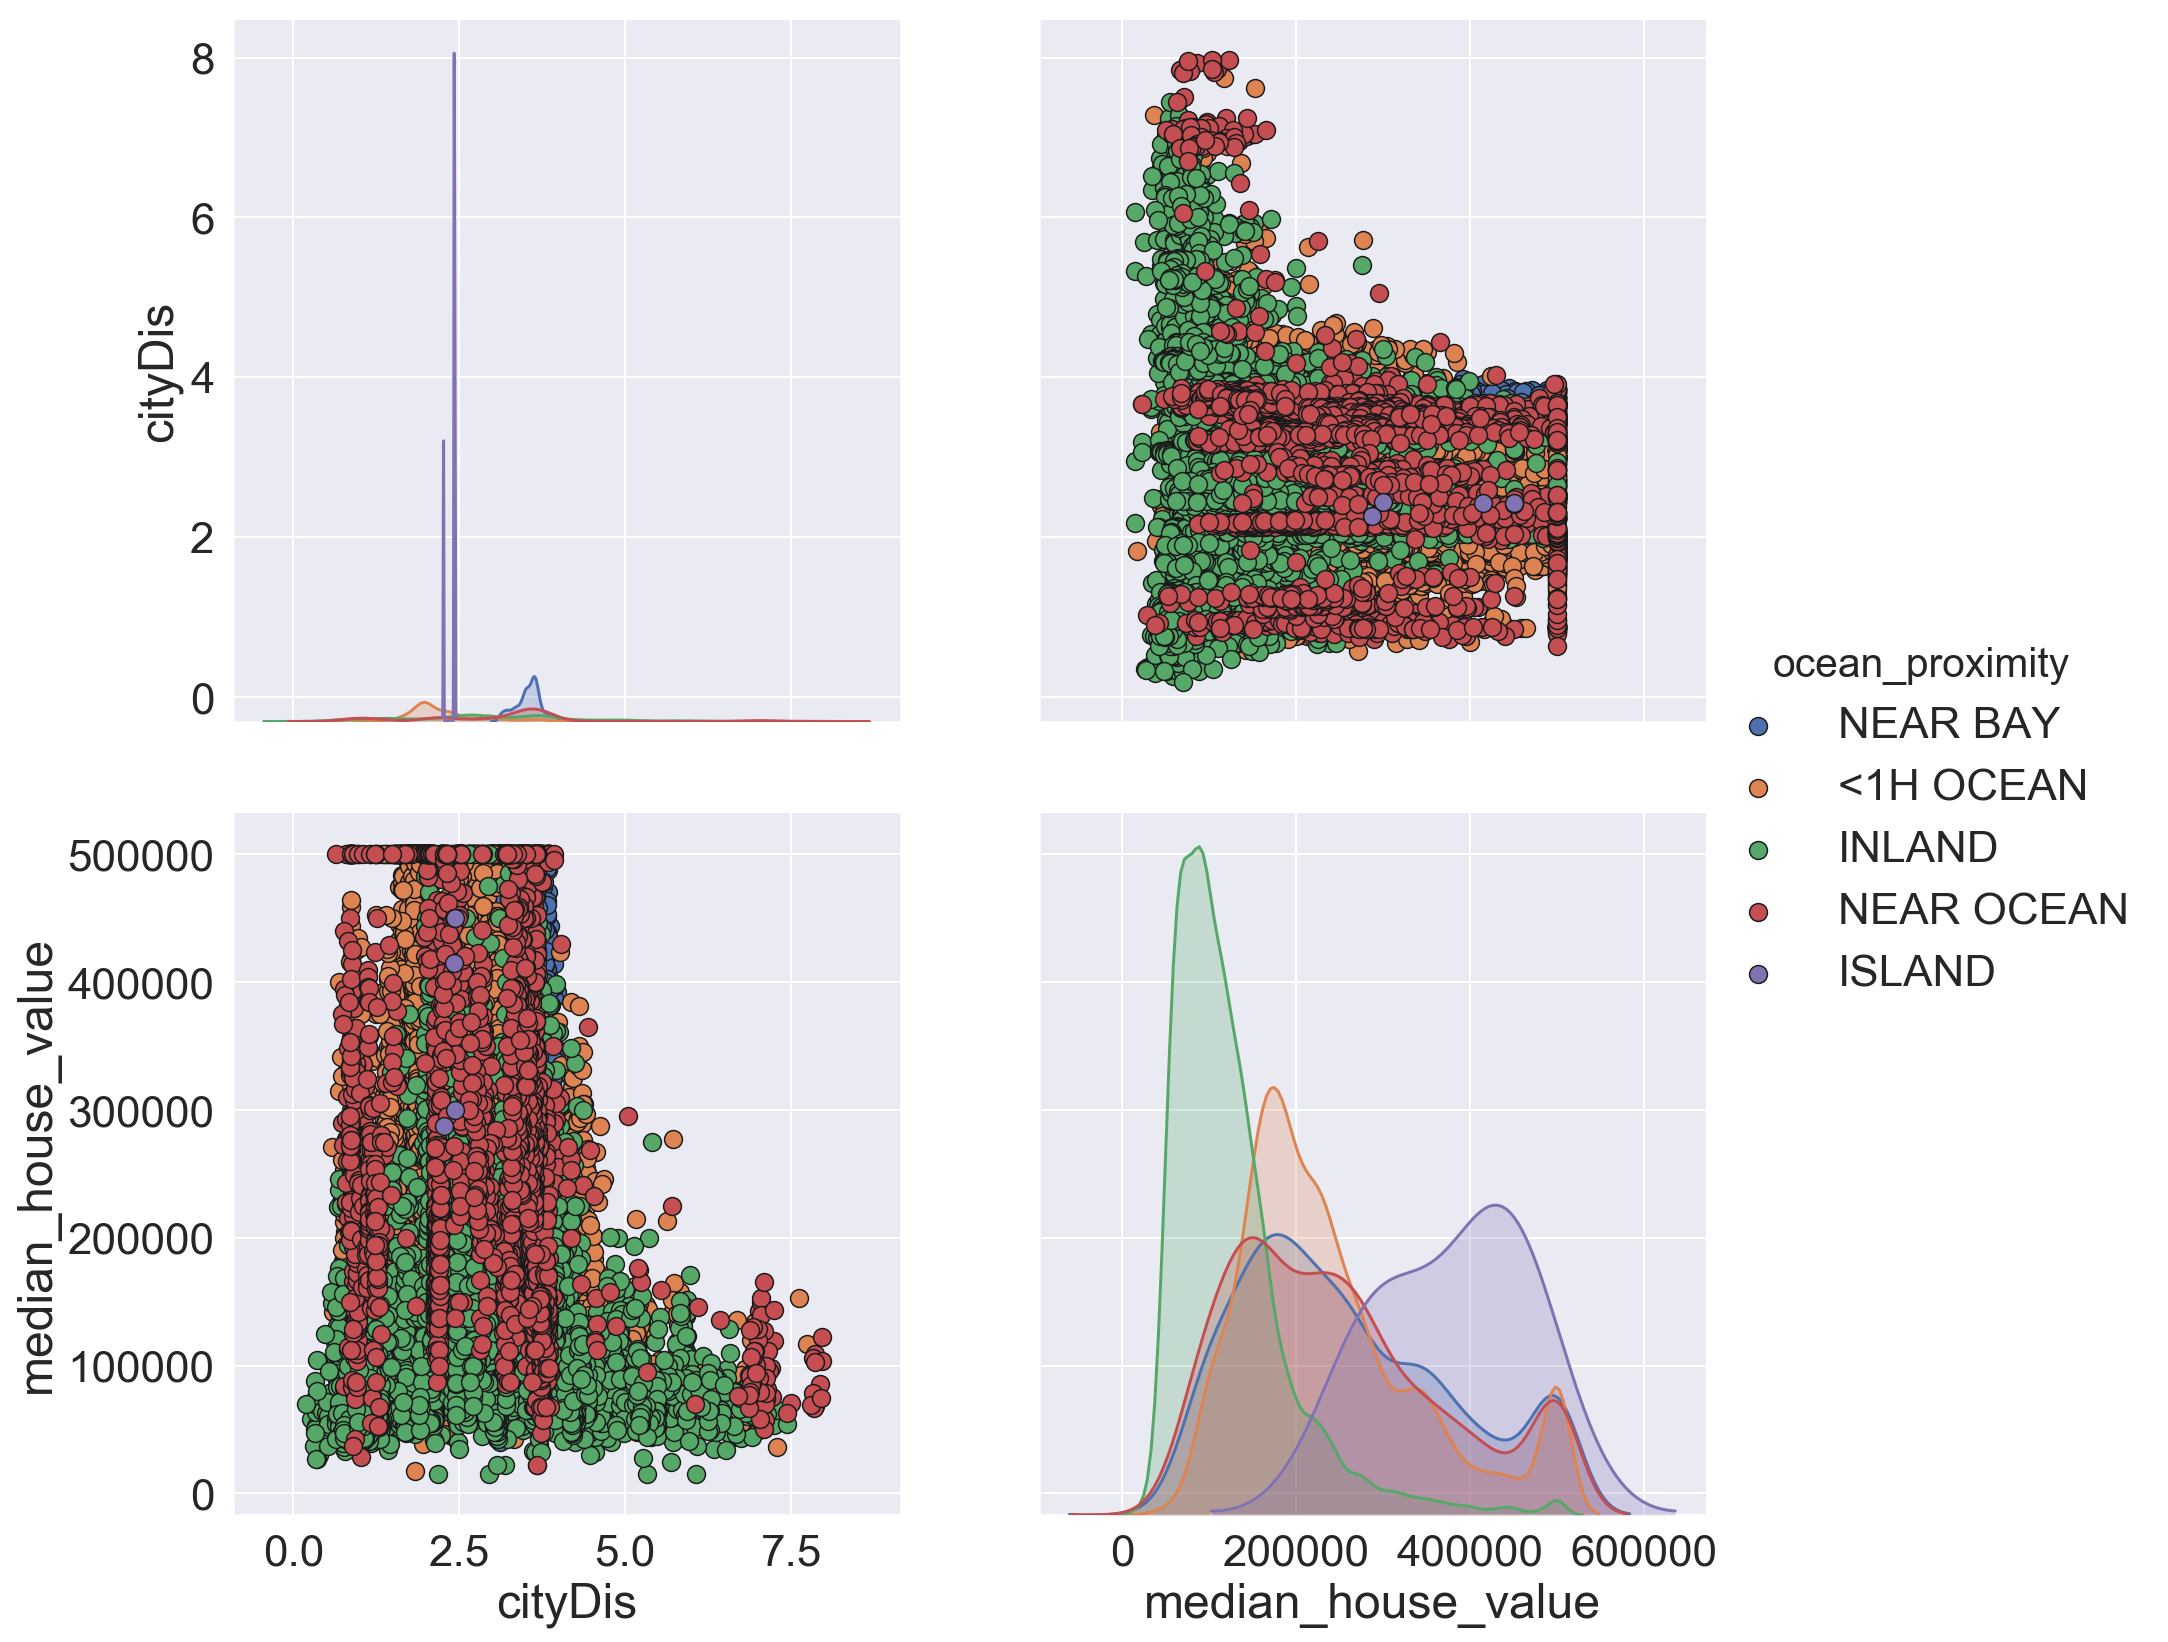

In [36]:
#查看新特徵與總價之間的相關性，出現負相關(離蛋黃區越遠總價越低)
#故建議加上特徵 'cityDis' (與City蛋黃區距離)
plotDf=df
sns.set(font_scale=2)
sns.pairplot(plotDf, 
             vars = ['cityDis','median_house_value'], diag_kind = 'kde' , hue='ocean_proximity',
             plot_kws = {'alpha': 1, 's': 80, 'edgecolor': 'k'},
             height = 6);

In [37]:
#屋齡跟價格(總假)沒有絕對的關係,可能要每坪價格
sns.set(font_scale=6)
f = plt.figure(figsize=(100,100)) 
sns.boxplot(x="housing_median_age", y="median_house_value",data=df, palette="Set3")

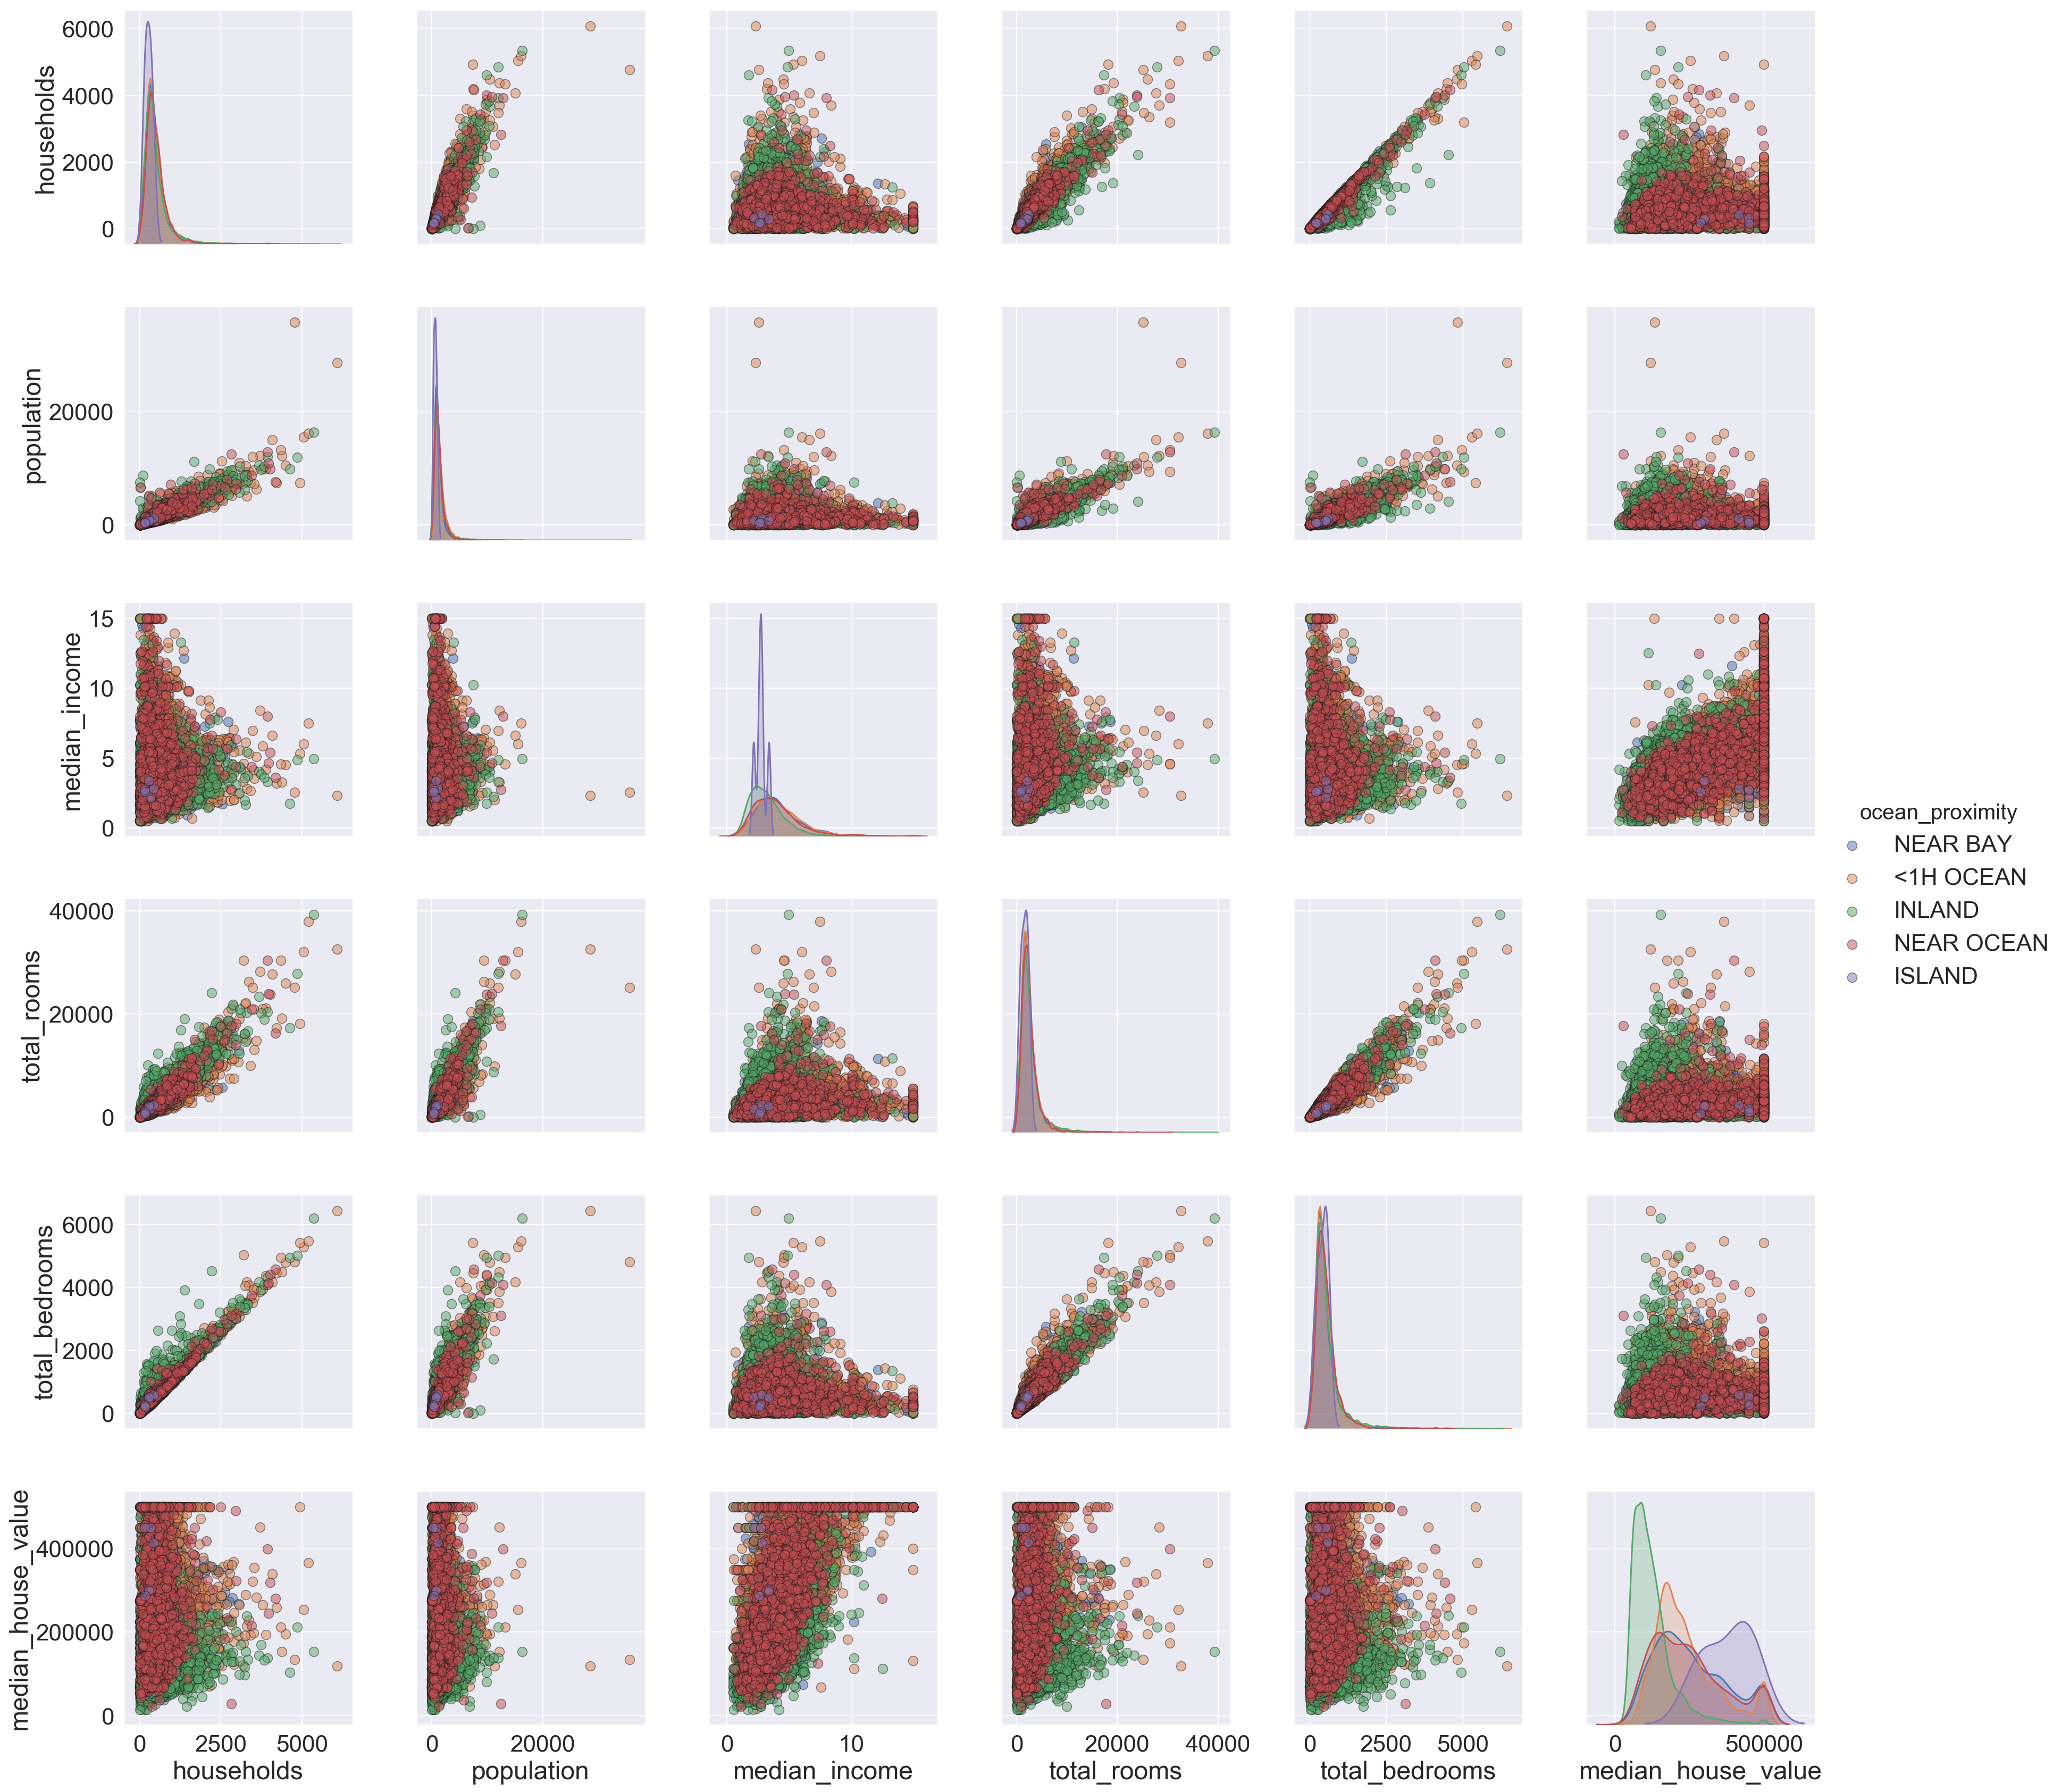

In [38]:
#住戶, 人口數, 收入(與房價正相關), 房間數, 臥室, 價格
sns.set(font_scale=2)

sns.pairplot(df, 
             vars = ['households','population','median_income','total_rooms','total_bedrooms','median_house_value'], diag_kind = 'kde' , hue='ocean_proximity',
             plot_kws = {'alpha': 0.5, 's': 80, 'edgecolor': 'k'},
             height = 4);

In [39]:
df[['housing_median_age'#屋齡
    ,'total_rooms'#格間
    ,'total_bedrooms'#臥房數
    ,'population'#人口
    ,'households'#戶數
    ,'median_income'#收入
    ,'median_house_value'#價格
   ]].describe()

housing_median_age   total_rooms  total_bedrooms    population  \
count        20433.000000  20433.000000    20433.000000  20433.000000   
mean            28.633094   2636.504233      537.870553   1424.946949   
std             12.591805   2185.269567      421.385070   1133.208490   
min              1.000000      2.000000        1.000000      3.000000   
25%             18.000000   1450.000000      296.000000    787.000000   
50%             29.000000   2127.000000      435.000000   1166.000000   
75%             37.000000   3143.000000      647.000000   1722.000000   
max             52.000000  39320.000000     6445.000000  35682.000000   

         households  median_income  median_house_value  
count  20433.000000   20433.000000        20433.000000  
mean     499.433465       3.871162       206864.413155  
std      382.299226       1.899291       115435.667099  
min        1.000000       0.499900        14999.000000  
25%      280.000000       2.563700       119500.000000  
50%      409.000000       3.536500       179700.000000  
75%      604.000000       4.744000       264700.000000  
max     6082.000000      15.000100       500001.000000

In [40]:
from sklearn.preprocessing import StandardScaler
def fieldSelection():
    selectedDF=df[[
       'housing_median_age'#屋齡
        ,'total_rooms'#格間
        ,'total_bedrooms'#臥房數
        ,'population'#人口
        ,'households'#戶數
        ,'median_income'#收入
        ,'median_house_value'#價格
        ,'cityDis' ]]   
                
      
    oneHotDF=df[['ocean_proximity']]
    oneHotDF=pd.get_dummies(data=oneHotDF,columns=['ocean_proximity'])    
          
    scale = StandardScaler()  #z-scaler物件
    train_set_scaled = pd.DataFrame(scale.fit_transform(selectedDF.iloc[:,:]),columns=selectedDF.keys()[:])
    train_set_scaled[oneHotDF.keys()]=oneHotDF[oneHotDF.keys()]
    
    return train_set_scaled 

In [41]:
train_set_scaled=fieldSelection()
train_set_scaled.shape

(20433, 13)

In [42]:
train_set_scaled.head()

housing_median_age  total_rooms  total_bedrooms  population  households  \
0            0.982163    -0.803813       -0.970325   -0.973320   -0.976833   
1           -0.606210     2.042130        1.348276    0.861339    1.670373   
2            1.855769    -0.535189       -0.825561   -0.819769   -0.843427   
3            1.855769    -0.623510       -0.718768   -0.765056   -0.733562   
4            1.855769    -0.461970       -0.611974   -0.758879   -0.628930   

   median_income  median_house_value   cityDis  ocean_proximity_<1H OCEAN  \
0       2.345163            2.128819  0.769169                        0.0   
1       2.332632            1.313626  0.749114                        0.0   
2       1.782939            1.258183  0.755408                        0.0   
3       0.932970            1.164622  0.761958                        0.0   
4      -0.013143            1.172418  0.761958                        0.0   

   ocean_proximity_INLAND  ocean_proximity_ISLAND  ocean_proximity_NEAR BAY  \
0                     0.0                     0.0                       1.0   
1                     0.0                     0.0                       1.0   
2                     0.0                     0.0                       1.0   
3                     0.0                     0.0                       1.0   
4                     0.0                     0.0                       1.0   

   ocean_proximity_NEAR OCEAN  
0                         0.0  
1                         0.0  
2                         0.0  
3                         0.0  
4                         0.0

In [43]:
df.shape

(20433, 13)

In [44]:
#訓練集為x1,y1(已取log的 avg)            #測試集為tx1,ty1  (ty1目前都是0)
x1=train_set_scaled.iloc[0:-4087,:]
y1=df.iloc[0:-4087,-1]

tx1=train_set_scaled.iloc[-4087:,:]
ty1=df.iloc[-4087:,-1]

In [45]:
param_test={
    #'max_depth':[4,5,6],
    #'min_child_weight':[2,3,4]
    'max_depth':[30],
    'min_child_weight':[1,2,3]
}
gsearch=GridSearchCV(estimator=XGBRegressor(),param_grid=param_test);
gsearch.fit(np.array(x1),np.array(y1))

GridSearchCV(cv='warn', error_score='raise-deprecating',
       estimator=XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, importance_type='gain',
       learning_rate=0.1, max_delta_step=0, max_depth=3,
       min_child_weight=1, missing=None, n_estimators=100, n_jobs=1,
       nthread=None, objective='reg:linear', random_state=0, reg_alpha=0,
       reg_lambda=1, scale_pos_weight=1, seed=None, silent=True,
       subsample=1),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'max_depth': [30], 'min_child_weight': [1, 2, 3]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [46]:
gsearch.cv_results_,gsearch.best_params_,gsearch.best_score_

({'mean_fit_time': array([3.26266416, 3.29800081, 3.23133222]),
  'std_fit_time': array([0.06113131, 0.09929181, 0.05901827]),
  'mean_score_time': array([0.02866729, 0.03066778, 0.03133345]),
  'std_score_time': array([0.00094252, 0.00047019, 0.00094308]),
  'param_max_depth': masked_array(data=[30, 30, 30],
               mask=[False, False, False],
         fill_value='?',
              dtype=object),
  'param_min_child_weight': masked_array(data=[1, 2, 3],
               mask=[False, False, False],
         fill_value='?',
              dtype=object),
  'params': [{'max_depth': 30, 'min_child_weight': 1},
   {'max_depth': 30, 'min_child_weight': 2},
   {'max_depth': 30, 'min_child_weight': 3}],
  'split0_test_score': array([0.98451879, 0.98740043, 0.98527496]),
  'split1_test_score': array([0.99980601, 0.99979958, 0.99981167]),
  'split2_test_score': array([0.9999524 , 0.99994947, 0.99994882]),
  'mean_test_score': array([0.99475875, 0.99571623, 0.99501151]),
  'std_test_score': ar

In [47]:
#做完特徵工程後分數提升到0.995
gsearch.best_score_

0.9957162345584548